In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import subprocess
from matplotlib.animation import FuncAnimation

from matplotlib.colors import ListedColormap
from scipy.io import loadmat
import natsort, pathlib
import os
import glob



## Enthalpy Temperature

In [37]:
df_Cu = pd.read_csv('enthalpy_Cu.csv',  encoding='utf-8')
df_Ti = pd.read_csv('enthalpy_Ti6Al4V.csv',  encoding='utf-8')
df_Cu.head()

,Temperature (K),Enthalpy (J/mol)
0,800.0,13475.717566
1,803.4,13573.444446
2,806.8,13671.171326
3,810.2,13768.898206
4,813.6,13866.625086


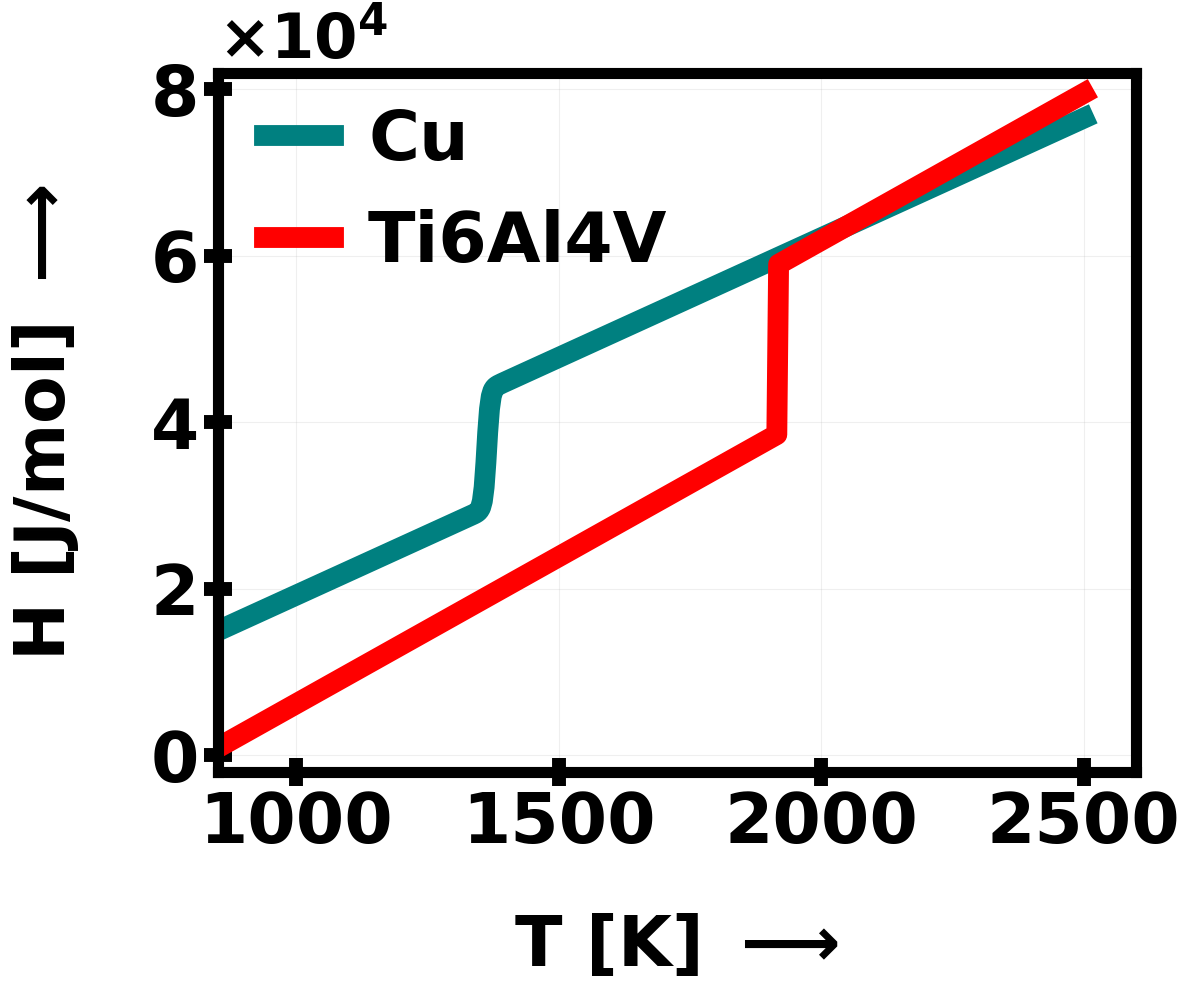

In [40]:
fig, ax1 = plt.subplots(1, 1, figsize=[12, 10], frameon=False) #figsize=[8, 10])
ax1.set_facecolor((0, 0, 0, 0))
Cu = ax1.plot(df_Cu['Temperature (K)'], df_Cu['Enthalpy (J/mol)'], color='teal', label=r'Cu', linestyle='-', linewidth=15)
Ti = ax1.plot(df_Ti['Temperature (K)'], df_Ti['Enthalpy (J/mol)'], color='red', label=r'Ti6Al4V', linestyle='-', linewidth=15)
ax1.legend(loc=(0.02, 0.67), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'50',},  handletextpad=0.5, handlelength=1.0,   frameon=False)

ax1.set_xlabel(r"T [K] $\mathbf{\longrightarrow}$", weight = 'bold', size=50, labelpad=40, color='k')
ax1.set_ylabel(r"H [J/mol] $\mathbf{\longrightarrow}$", weight = 'bold', size=50, labelpad=50, color='k')
# ax1.get_yaxis().get_offset_text().set_position((-0.01, 0))

ax1.set_yticks([0, 2e4, 4e4, 6e4, 8e4], labels=[ '0', '2', '4', '6', '8'], size=50, color='k', rotation=0,  weight='bold')
ax1.set_title(r'$\mathbf{\times}$10$\mathbf{^{4}}$', pad=0, loc='left', color='black', fontsize=45, weight='bold')
ax1.set_xticks([1000, 1500, 2000, 2500], labels=['1000', '1500', '2000', '2500'], size=50, color='k', weight='bold')

ax1.set_ylim(-0.2e4, 8.2e4)
ax1.set_xlim(850, 2600)

ax1.tick_params(axis='y', direction='inout', which='both', length=20, width=10)
ax1.tick_params(axis='x', direction='inout', which='both', length=20, width=10)

ax1.spines[:].set_linewidth(8)


ax1.grid(alpha=0.2)

plt.tight_layout()
plt.savefig('T_H.jpg',bbox_inches='tight')
plt.savefig('T_H.png',bbox_inches='tight', transparent=True, dpi=800)

plt.show()

## Temperature X-axis

In [5]:
df1 = pd.read_csv('csv_files/t5.csv',  encoding='utf-8') # 0.42ms
df2 = pd.read_csv('csv_files/t80.csv',  encoding='utf-8') # 
df3 = pd.read_csv('csv_files/t150.csv',  encoding='utf-8') # 12.8 ms
df4 = pd.read_csv('csv_files/t250.csv',  encoding='utf-8') # 21.3 ms
df5 = pd.read_csv('csv_files/t322.csv',  encoding='utf-8') # 27.4 ms
df6 = pd.read_csv('csv_files/t460.csv',  encoding='utf-8') # 39.1 ms
df1.head()

,temperature,Points:0
0,1224.7,0.000000
1,1224.6,0.000008
2,1222.0,0.000016
3,1219.3,0.000024
4,1216.9,0.000032


In [6]:
t_1 = '0.42 ms'
# t_2 = '0.42 ms'
t_3 = '12.8 ms'
t_4 = '21.3 ms'
t_5 = '27.4 ms'
t_6 = '39.1 ms'

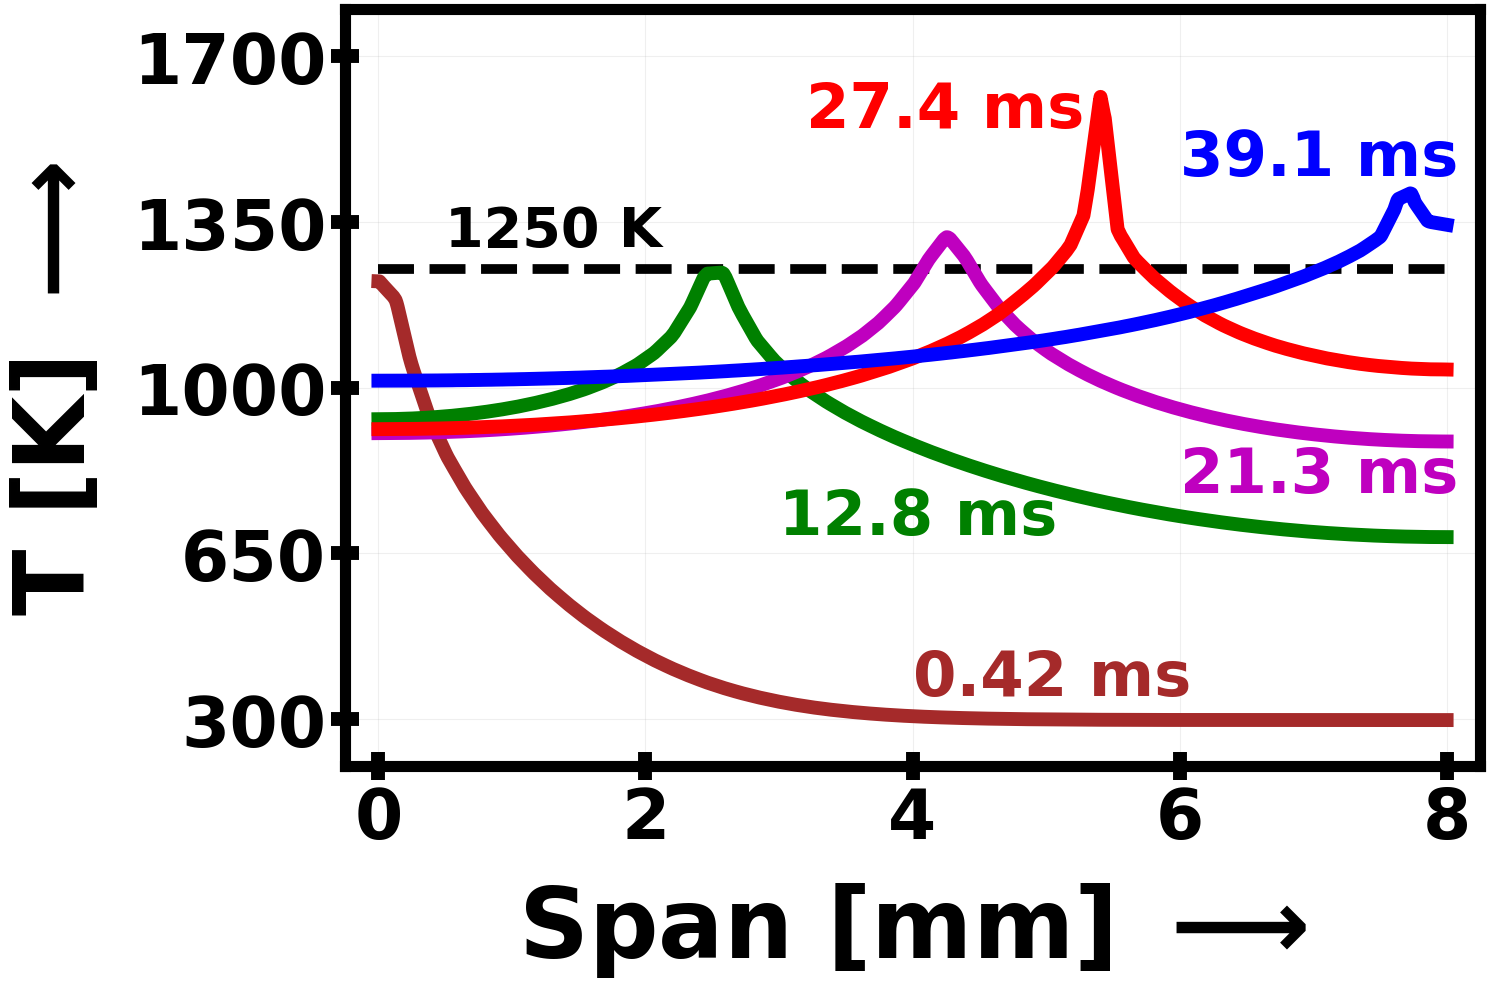

In [42]:
fig, ax1 = plt.subplots(1, 1, figsize=[15, 10], frameon=False) #figsize=[8, 10])
ax1.set_facecolor((0, 0, 0, 0))

# melting = ax1.hlines(y=1358, xmin = 0, xmax = 8, linestyle="--", linewidth=7, color = 'k')
melting = ax1.hlines(y=1250, xmin = 0, xmax = 8, linestyle="--", linewidth=7, color = 'k')

t1 = ax1.plot(df1['Points:0']*1000, df1['temperature'], color='brown', label=r'5 ms', linestyle='-', linewidth=10)
t3 = ax1.plot(df3['Points:0']*1000, df3['temperature'], color='green', label=r'150 ms', linestyle='-', linewidth=10)
t4 = ax1.plot(df4['Points:0']*1000, df4['temperature'], color='m', label=r'250 ms', linestyle='-', linewidth=10)
t5 = ax1.plot(df5['Points:0']*1000, df5['temperature'], color='red', label=r'322 ms', linestyle='-', linewidth=10)
t6 = ax1.plot(df6['Points:0']*1000, df6['temperature'], color='blue', label=r'460 ms', linestyle='-', linewidth=10)


# ax1.legend(loc=(0.02, 0.9), ncol=5,  columnspacing=1.0, prop={'weight':'bold', 'size':'25',},  handletextpad=0.5, handlelength=1.0,   frameon=False)

ax1.set_ylabel(r"T [K] $\mathbf{\longrightarrow}$", weight = 'bold', size=70, labelpad=20, color='k')
ax1.set_xlabel(r"Span [mm] $\mathbf{\longrightarrow}$", weight = 'bold', size=70, labelpad=20, color='k')

ax1.set_yticks([300, 650, 1000, 1350, 1700], labels=[ '300', '650', '1000', '1350', '1700'], size=50, color='k', rotation=0,  weight='bold')
ax1.set_xticks([0, 2, 4, 6, 8], labels=['0', '2', '4', '6', '8'], size=50, color='k', weight='bold')


ax1.text(0.5,1300, s='1250 K', color = 'k', fontsize=40, weight='bold',)

t_1_legend = ax1.text(4, 350, s='0.42 ms' , color = 'brown', fontsize=45, weight='bold',)
t_3_legend = ax1.text(3, 690, s='12.8 ms' , color = 'green', fontsize=45, weight='bold',)
t_4_legend = ax1.text(6, 780, s='21.3 ms' , color = 'm', fontsize=45, weight='bold',)
t_5_legend = ax1.text(3.2, 1550, s='27.4 ms' , color = 'red', fontsize=45, weight='bold',)
t_6_legend = ax1.text(6, 1450, s='39.1 ms' , color = 'blue', fontsize=45, weight='bold',)


ax1.set_ylim(200, 1800)
ax1.set_xlim(-0.25, 8.25)

ax1.tick_params(axis='y', direction='inout', which='both', length=20, width=10)
ax1.tick_params(axis='x', direction='inout', which='both', length=20, width=10)

ax1.spines[:].set_linewidth(8)


ax1.grid(alpha=0.2)

plt.tight_layout()
plt.savefig('T_x.jpg',bbox_inches='tight')
plt.savefig('T_x.png',bbox_inches='tight', transparent=True, dpi=800)

plt.show()

## Density Plot

In [54]:
def Cu_LIQ(T):
    A, B, C, D = -2.383e-11, 8.69e-8, 7.89, -7.96e-04
    return np.where(T>1358, A*(T-1330)**3 + B*(T-1330)**2 + C*(T-1330) + D, np.nan)

def Cu_SOL(T):
    A, B, C, D = -2.77e-11, -6.12e-8, 881.0, -4.28e-04
    return np.where(T<1358, A*(T-300)**3 + B*(T-300)**2 + C*(T-300) + D, np.nan)

def AIR(T):
    A, B, C, D, E = -7.65e-07, 3.16e-03, -1.94, 1.0, 11.4
    return np.where(T<1400, A*T**2 + B*T + C*np.log(D*T) + E, np.nan)

def Ti_LIQ(T):
    A, B = -0.452, 4955.0
    return np.where(T>1923, A*T + B, np.nan)
    
def Ti_SOL(T):
    A, B, C, D = 1.152, -4.1197e-04, 6542.63, -425.4
    return np.where(T<1923, A*T + B*T**2 + C*np.log(T) + D, np.nan)


T = np.linspace(300, 2500, 2200)

Cu_LIQ = Cu_LIQ(T)
Cu_SOL = Cu_SOL(T)
AIR = AIR(T)
Ti_SOL = Ti_SOL(T)
Ti_LIQ = Ti_LIQ(T)

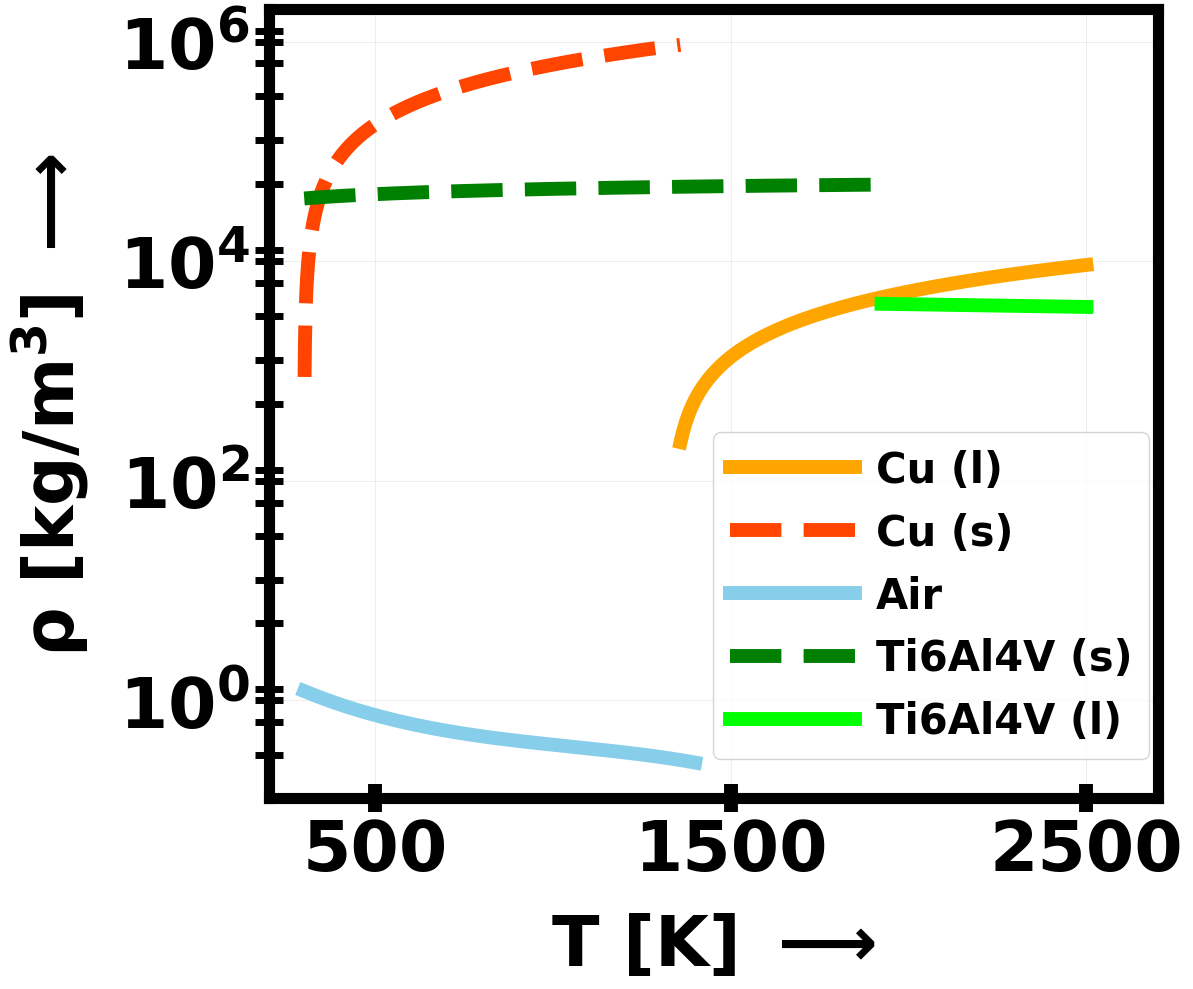

In [242]:
fig, ax1 = plt.subplots(1, 1, figsize=[12, 10], frameon=False) #figsize=[8, 10])
ax1.set_facecolor((0, 0, 0, 0))

t1 = ax1.plot(T, Cu_LIQ, color='orange',  linestyle='-', linewidth=10, label='Cu (l)')
t3 = ax1.plot(T, Cu_SOL, color='orangered', linestyle='--', linewidth=10, label='Cu (s)')
t4 = ax1.plot(T, AIR, color='skyblue', linestyle='-', linewidth=10, label='Air')
t5 = ax1.plot(T, Ti_SOL, color='green', linestyle='--', linewidth=10, label='Ti6Al4V (s)')
t6 = ax1.plot(T, Ti_LIQ, color='lime', linestyle='-', linewidth=10, label='Ti6Al4V (l)')

ax1.set_yscale('log', base=100, subs=[10**x for x in (0, 0.1, 0.7, 1.1, 1.5, 1.8)], nonpositive='mask')

ax1.legend(loc=(0.50, 0.05), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'30',},  handletextpad=0.5, handlelength=3.0,   frameon=True)

ax1.set_ylabel(r"$\mathbf{\rho}$ [$\mathbf{kg/m^3}$] $\mathbf{\longrightarrow}$", weight = 'bold', size=50, labelpad=20, color='k')
ax1.set_xlabel(r"T [K] $\mathbf{\longrightarrow}$", weight = 'bold', size=50, labelpad=20, color='k')

ax1.set_yticks([1e0,  1e2,  1e4,  1e6 ], labels=[ r'$\mathbf{10^0}$', r'$\mathbf{10^2}$', r'$\mathbf{10^4}$', r'$\mathbf{10^6}$', ], size=50, color='k', rotation=0,  weight='bold')
ax1.set_xticks([500,  1500,  2500], labels=['500',  '1500',  '2500'], size=50, color='k', weight='bold')

# ax1.set_ylim(200, 1800)
ax1.set_xlim(200, 2700)

ax1.tick_params(axis='y', direction='inout', which='both', length=20, width=5)
ax1.tick_params(axis='x', direction='inout', which='both', length=20, width=10)

ax1.spines[:].set_linewidth(8)


ax1.grid(alpha=0.2)

plt.tight_layout()
# plt.savefig('rho.jpg',bbox_inches='tight')
# plt.savefig('rho.png',bbox_inches='tight', transparent=True, dpi=800)

plt.show()

## Thermal Conductivity

In [269]:
def Cu_LIQ(T):
    A, B, C = 0.00156, -1.252, 0.00156
    return np.where(T>1390, A*T**3 + B*T**2 + C*T, np.nan)

def Cu_SOL(T):
    A, B, C = 0.00068, -0.30587, 452.1324
    return np.where(T<1300, A*T**3 + B*T**2 + C*T, np.nan)

def AIR(T):
    A, B, C, D, E, F = 1.708186e-4, 0, 0, 0, 0, -7.488e-3
    return np.where(T<1400, A*T + B*T**2 + C*T**3 + D*T**4 + E*T**5 + F, np.nan)

def Ti_LIQ(T):
    A, B = 0.0183, -6.66
    return np.where(T>1950, A*T + B, np.nan)

def Ti_SOL(T):
    A, B = 1.46e-02, -0.32
    return np.where(T<1900, A*T + B, np.nan)

T = np.linspace(300, 2500, 2200)

Cu_LIQ = Cu_LIQ(T)
Cu_SOL = Cu_SOL(T)
AIR = AIR(T)
Ti_SOL = Ti_SOL(T)
Ti_LIQ = Ti_LIQ(T)

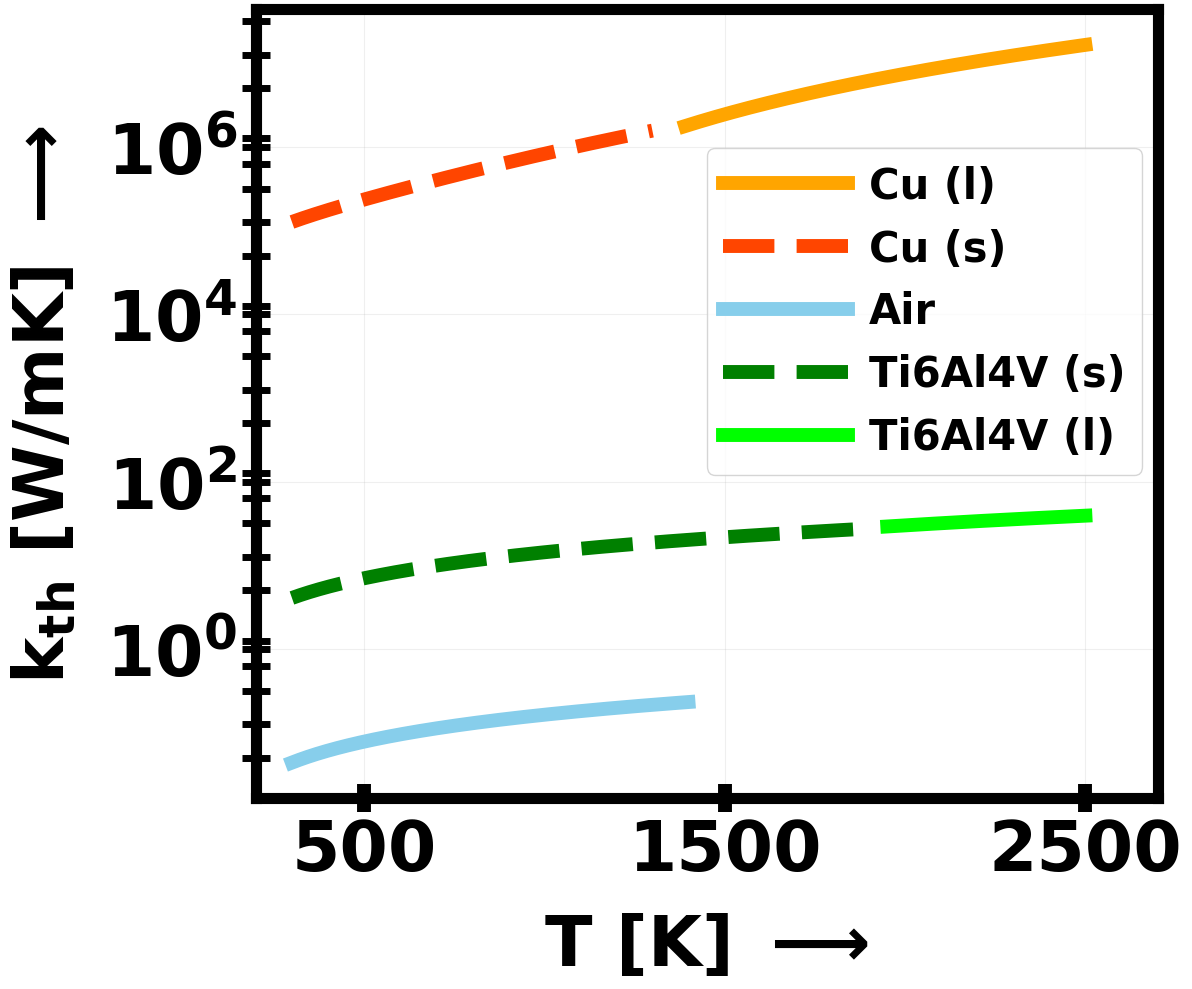

In [271]:
fig, ax1 = plt.subplots(1, 1, figsize=[12, 10], frameon=False) #figsize=[8, 10])
ax1.set_facecolor((0, 0, 0, 0))

t1 = ax1.plot(T, Cu_LIQ, color='orange',  linestyle='-', linewidth=10, label='Cu (l)')
t3 = ax1.plot(T, Cu_SOL, color='orangered', linestyle='--', linewidth=10, label='Cu (s)')
t4 = ax1.plot(T, AIR, color='skyblue', linestyle='-', linewidth=10, label='Air')
t5 = ax1.plot(T, Ti_SOL, color='green', linestyle='--', linewidth=10, label='Ti6Al4V (s)')
t6 = ax1.plot(T, Ti_LIQ, color='lime', linestyle='-', linewidth=10, label='Ti6Al4V (l)')

ax1.set_yscale('log', base=100, subs=[10**x for x in (0, 0.1, 0.7, 1.1, 1.5, 1.8)], nonpositive='mask')

ax1.legend(loc=(0.50, 0.41), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'30',},  handletextpad=0.5, handlelength=3.0,   frameon=True)

ax1.set_ylabel(r"k$_\mathbf{th}$ [$\mathbf{W/mK}$] $\mathbf{\longrightarrow}$", weight = 'bold', size=50, labelpad=20, color='k')
ax1.set_xlabel(r"T [K] $\mathbf{\longrightarrow}$", weight = 'bold', size=50, labelpad=20, color='k')

ax1.set_yticks([1e0,  1e2,  1e4,  1e6 ], labels=[ r'$\mathbf{10^0}$', r'$\mathbf{10^2}$', r'$\mathbf{10^4}$', r'$\mathbf{10^6}$', ], size=50, color='k', rotation=0,  weight='bold')
ax1.set_xticks([500,  1500,  2500], labels=['500',  '1500',  '2500'], size=50, color='k', weight='bold')

# # ax1.set_ylim(200, 1800)
ax1.set_xlim(200, 2700)

ax1.tick_params(axis='y', direction='inout', which='both', length=20, width=5)
ax1.tick_params(axis='x', direction='inout', which='both', length=20, width=10)

ax1.spines[:].set_linewidth(8)


ax1.grid(alpha=0.2)

plt.tight_layout()
# plt.savefig('k_th.jpg',bbox_inches='tight')
# plt.savefig('k_th.png',bbox_inches='tight', transparent=True, dpi=800)

plt.show()

## Free Energy

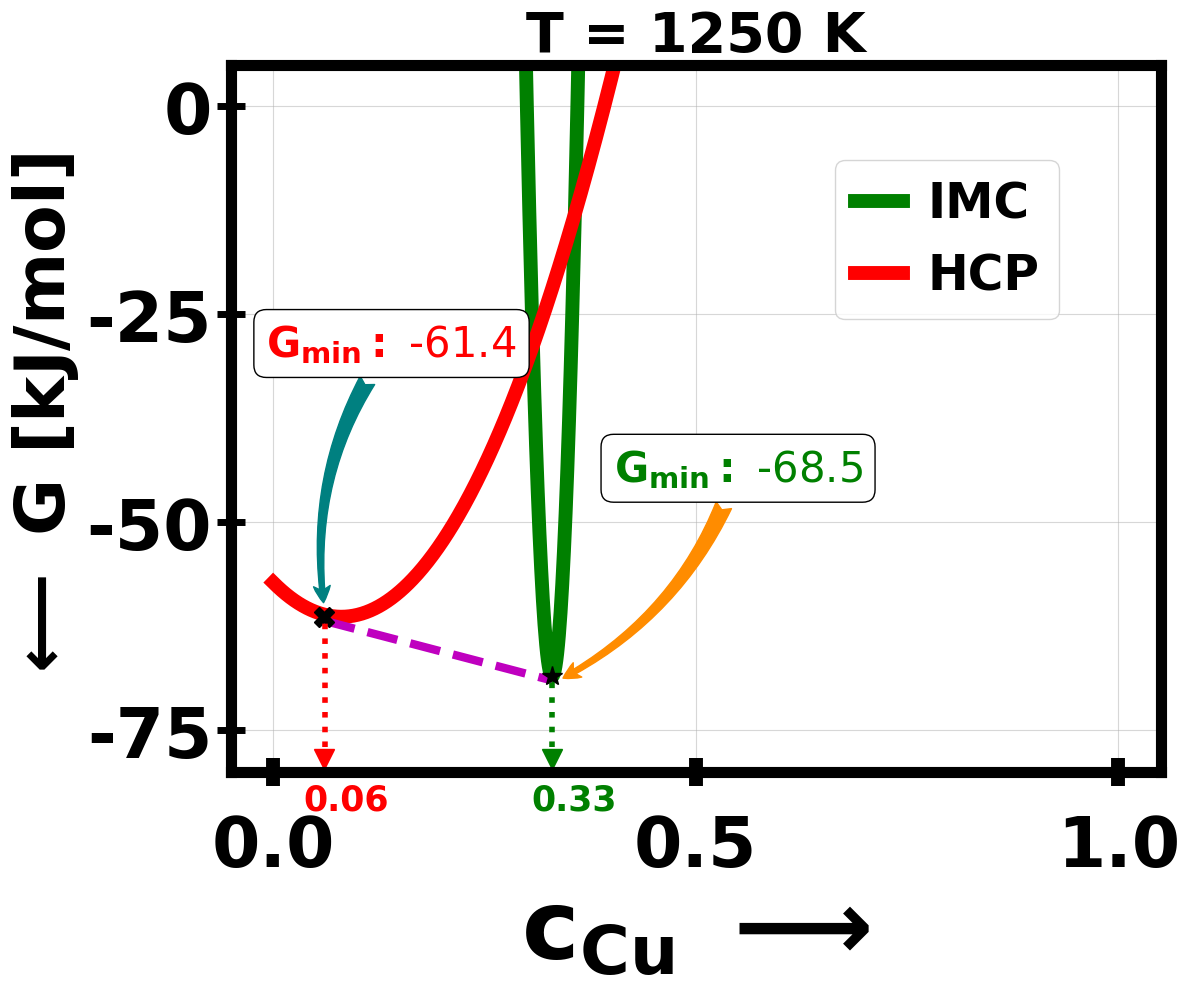

In [3]:
X = np.arange(0.0, 1.0, 0.001) #Changes the equation to  whole range

A1, B1, C1, D1, x1e, Th1 = -3.1, -2.5, 3.6, 3.7, 0.7015, -14950.7 ## Ti rich
A2, B2, C2, D2, x2e, Th2 = -295,   -2.5, 3.6, 3.7, 1.22526, -19006 ## IMC

G_FCC1= Th1*(A1*(D1*X - x1e)**2 + B1*(D1*X - x1e) + C1)
G_FCC2= Th2*(A2*(D2*X - x2e)**2 + B2*(D2*X - x2e) + C2)

fig, ax1 = plt.subplots(1,1, figsize=(12,10), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)
ax1.grid(alpha=0.5)

point1 = [X[np.argmin(G_FCC1)]-0.02, min(G_FCC1)]
point2 = [X[np.argmin(G_FCC2)], min(G_FCC2)]
x_values = [point1[0], point2[0]]
y_values = [point1[1]-500, point2[1]-500]

label1 = [r"$\mathbf{Ti_2Cu}$", r"IMC"]
label2 = [r"Ti-rich", r"HCP"]

ax1.plot(X, G_FCC2, color='green', linewidth=10, label=label1[1])
ax1.plot(X, G_FCC1, color='red', linewidth=10, label=label2[1])
ax1.plot(x_values, y_values,  linestyle="--", linewidth=6, markersize=20, color='m')

# ax1.text(point1[0]*0.8, point1[1]*1.15, "A", fontsize=30, color='k', weight='bold')
# ax1.text(point2[0]*0.95, point2[1]*1.12, "B", fontsize=30, color='k', weight='bold')



ax1.plot(0.06, int(f'{min(G_FCC1):.0f}'), marker='X', color='k', markersize=15, markeredgecolor='k', markerfacecolor='k')
ax1.plot(0.33, int(f'{min(G_FCC2):.0f}'), marker='*', color='k', markersize=15, markeredgecolor='k', markerfacecolor='k')

ax1.annotate(r'$\mathbf{G_{min}:}$ '+f'{min(G_FCC1)/1000:.1f}', horizontalalignment='center',
             xy = (0.06, -60000), xytext = (0.14, -30000), bbox=dict(boxstyle="round", fc="w",), arrowprops=dict(arrowstyle='Fancy', color='teal', fc='teal', connectionstyle='arc3, rad=0.2'), fontsize=30, color='red')

ax1.annotate(r'$\mathbf{G_{min}:}$ '+f'{min(G_FCC2)/1000:.1f}', horizontalalignment='center',
             xy = (0.34, -68900), xytext = (0.55, -45000), bbox=dict(boxstyle="round", fc="w",), arrowprops=dict(arrowstyle='Fancy', color='darkorange', fc='darkorange', connectionstyle='arc3, rad=-0.2'), fontsize=30, color='green')


ax1.vlines(x=point1[0], ymin=-77000, ymax=-62000, linestyle = ':', color='r', linewidth=4)
ax1.vlines(x=point2[0], ymin=-77000, ymax=-69000, linestyle = ':', color='g', linewidth=4)
ax1.text(x=point1[0]-0.025, y=-84500, s=f'{point1[0]:.2f}', fontsize=25, weight='bold', color='red')
ax1.text(x=point2[0]-0.025, y=-84500, s=f'{point2[0]:.2f}', fontsize=25, weight='bold', color='green')

ax1.legend(loc=(0.65, 0.64), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'35',},  handletextpad=0.5, handlelength=1.0,   frameon=True)#

ax1.set_xlim(-0.05,1.05)
ax1.set_ylim(-80000,5000)
ax1.set_xlabel(r"c$\mathbf{_{Cu}}$ $\mathbf{\longrightarrow}$", color='k', weight='bold',  fontsize=70)
ax1.set_ylabel(r"$\mathbf{\longleftarrow}$ G [kJ/mol]", color='k', weight='bold',  fontsize=50)
ax1.set_title("T = 1250 K", fontsize=40, pad= 10, weight='bold')
ax1.set_xticks([0, 0.5, 1.0], labels=['0.0',  '0.5', '1.0'], size=50, color='k',  weight='bold')
ax1.set_yticks([0, -25000, -50000, -75000,], labels=['0', '-25', '-50', '-75',], size=50, color='k', weight='bold')
# ax1.set_title("Gibbs free energy",fontsize=40, pad= 35, weight='bold')

ax1.plot(point1[0]-0.0005, -78500, marker='v', color='red', markersize=15)
ax1.plot(point2[0]-0.0005, -78500, marker='v', color='green', markersize=15)

# ax1.tick_params(axis='y', direction='inout', which='both', length=15, width=5)
# ax1.tick_params(axis='x', direction='inout', which='both', length=10, width=5)
# ax1.spines[:].set_linewidth(4)

ax1.tick_params(axis='y', direction='inout', which='both', length=20, width=5)
ax1.tick_params(axis='x', direction='inout', which='both', pad=20, length=20, width=10)

ax1.spines[:].set_linewidth(8)

plt.tight_layout()

# plt.savefig('Gibbs.jpg',bbox_inches='tight')
# plt.savefig('Gibbs.png',bbox_inches='tight', transparent=True, dpi=800)

plt.show()